# Soal latihan untuk persiapan Live Code 1

Kisi-kisi apa saja yang akan keluar:
- Load data pandas menggunakan pd.read_csv, pd.read_excel.
- Pembuatan dan penggunaan fungsi 
- Pandas Query/Filtering
- For loop dan conditional if yang diterapkan pada pandas
- Akses row dataframe pandas menggunakan loc/iloc
- Akses kolom dataframe pandas
- Penggunaan method di dataframe/series pandas terutama method agregat (rata-rata, min, max, count, std, dll)

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

sisi_1 = [22, 15, 9, 5, 17, 22, 16, 6, 6, 20, 8, 30, 9, 15, 11, 17, 5, 16, 9, 26]
sisi_2 = [10, 5, 5, 13, 6, 12, 8, 5, 16, 17, 5, 22, 12, 10, 15, 3, 6, 13, 15, 5]

df = pd.DataFrame({'sisi1': sisi_1, 'sisi2': sisi_2})
df

,sisi1,sisi2
0,22,10
1,15,5
2,9,5
3,5,13
4,17,6
5,22,12
6,16,8
7,6,5
8,6,16
9,20,17


In [51]:
df2 = df.head()
df2

,sisi1,sisi2
0,22,10
1,15,5
2,9,5
3,5,13
4,17,6


- jika sisi 1 genap, hitung luas
- jika sisi 1 ganjil, hitung keliling

In [16]:
df2.iloc[0, 0]

22

In [15]:
df2['sisi1'].iloc[0]

22

In [17]:
df['sisi1'].iloc[0] % 2 == 0

True

In [21]:
list_penampung = []

for idx in range(len(df2)):
  if df2['sisi1'].iloc[idx] % 2 == 0:                                         # pengecekan genap
    luas = df2['sisi1'].iloc[idx] * df2['sisi2'].iloc[idx]                    # hitung luas
    list_penampung.append(luas)                                               # simpan hasil perhitungan ke list

  elif df2['sisi1'].iloc[idx] % 2 == 1:                                       # pengecekan ganjil
    keliling = (2 * df2['sisi1'].iloc[idx]) + (2 * df2['sisi2'].iloc[idx])    # hitung keliling
    list_penampung.append(keliling)                                           # simpan hasil perhitungan ke list

In [50]:
df2['hasil_forloop'] = list_penampung
df2

,sisi1,sisi2,hasil_forloop
0,NaN,NaN,220
1,NaN,NaN,40
2,NaN,NaN,28
3,NaN,NaN,36
4,NaN,NaN,46


- jika sisi1 ganjil, drop baris

In [34]:
df2

,sisi1,sisi2,hasil_forloop
0,22,10,220
3,5,13,36
4,17,6,46


In [38]:
df2

,sisi1,sisi2,hasil_forloop
0,22,10,220
1,5,13,36
2,17,6,46


In [45]:
df2.reset_index(drop=True, inplace=True)
df2.drop(0, axis=0, inplace=True)
df2

In [55]:
df2.sort_values()

TypeError: ignored

In [53]:
index_ganjil = []

for id in range(len(df2)):
  if df2['sisi1'].iloc[id] % 2 == 1:
    df2.reset_index(drop=True, inplace=True)
    # df2.drop(id, axis=0, inplace=True)
    df2.drop(id, axis=0, inplace=True)
    id = id - 1

IndexError: ignored

In [52]:
df2

,sisi1,sisi2
0,22,10
1,15,5
2,9,5
3,5,13
4,17,6


In [29]:
index_ganjil

[1, 2, 3, 4]

In [30]:
df2.drop(index_ganjil, axis=0)

,sisi1,sisi2,hasil_forloop
0,22,10,220
1,15,5,40
2,9,5,28
3,5,13,36
4,17,6,46


1. Buatlah dua fungsi untuk menghitung luas persegi dan jajargenjang

2. Dengan data berikut, buatlah kolom baru yang bernama `luas` yang menyimpan hasil perhitungan luas persegi dan jajargenjang, dimana untuk kolom sisi1 yang nilainya lebih dari 10 akan dihitung luas persegi, dan kurang dari 10 dihitung jajargenjang. **(Hint: Gunakan for loop dan if statement untuk mengerjakan nomor 2, kamu bisa menggunakan list untuk menyimpan perhitungan sementara, setelahnya dapat dimasukkan ke kolom luas)**.

3. Hitung standar deviasi (.std) kolom luas dimana sisi1 lebih dari 10 atau sisi 2 ganjil

In [56]:
df3 = df.copy()
df3

,sisi1,sisi2
0,22,10
1,15,5
2,9,5
3,5,13
4,17,6
5,22,12
6,16,8
7,6,5
8,6,16
9,20,17


In [57]:
df3['sisi1'].skew()

0.525163994048628

In [69]:
# IQR
Q1 = df3['sisi1'].quantile(.25)
Q3 = df3['sisi1'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (0.5*IQR)
lower = Q1 - (0.5*IQR)

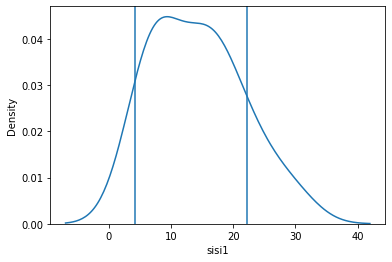

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(df3['sisi1'])
plt.axvline(upper)
plt.axvline(lower)

In [74]:
df3[df3['sisi1']>upper]

,sisi1,sisi2
11,30,22
19,26,5


In [73]:
# cara 1
# query - ambil yang didalam batas boundaries
df3[(df3['sisi1'] < upper) &
    (df3['sisi1'] > lower)]

,sisi1,sisi2
0,22,10
1,15,5
2,9,5
3,5,13
4,17,6
5,22,12
6,16,8
7,6,5
8,6,16
9,20,17


In [78]:
list(df[df3['sisi1'] > upper].index)

[11, 19]

In [86]:
df[df3['sisi1'] < lower].index.tolist() + [1]

[1]

In [82]:
# cara 2 - manually get outlier index then drop
outlier_atas = list(df[df3['sisi1'] > upper].index)
outlier_bawah = df[df3['sisi1'] < lower].index.tolist() + [1]

In [ ]:
for_drop = outlier_atas + outlier_bawah

df3.drop(for_drop)

In [59]:
help(df.quantile)

Help on method quantile in module pandas.core.frame:

quantile(q=0.5, axis: 'Axis' = 0, numeric_only: 'bool' = True, interpolation: 'str' = 'linear') method of pandas.core.frame.DataFrame instance
    Return values at the given quantile over requested axis.
    
    Parameters
    ----------
    q : float or array-like, default 0.5 (50% quantile)
        Value between 0 <= q <= 1, the quantile(s) to compute.
    axis : {0, 1, 'index', 'columns'}, default 0
        Equals 0 or 'index' for row-wise, 1 or 'columns' for column-wise.
    numeric_only : bool, default True
        If False, the quantile of datetime and timedelta data will be
        computed as well.
    interpolation : {'linear', 'lower', 'higher', 'midpoint', 'nearest'}
        This optional parameter specifies the interpolation method to use,
        when the desired quantile lies between two data points `i` and `j`:
    
        * linear: `i + (j - i) * fraction`, where `fraction` is the
          fractional part of the i